In [2]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

nondef1, nondef2, nondef3, nondef4, nondef5 = sy.symbols('nondef1, nondef2, nondef3, nondef4, nondef5')      

In [3]:
# Präfixe
_nano = 10 ** (-9)
_mikro = 10 ** (-6)
_milli = 10 ** (-3)
_centi = 10 ** (-2)
_dezi = 10 ** (-1)

_Kilo = 10 ** 3
_Mega = 10 ** 6
_Giga = 10 ** 9
_Tera = 10 ** 12

# Winkel
_degree = 2*np.pi/360

In [4]:
# feste Parameter und ihre Zahlenwerte: diese werden später in der Fehlerfunktion numerisch gemacht aber bleiben für die partiellen Ableitungen symbolisch
g, pi, mu_0, G = sy.symbols('g, pi, mu_0, G')            
                                                
fix_parameters = {
    G: 6.672 * 10 ** (-11),
    g: 9.81, 
    pi: 3.141,
    mu_0: 4 * np.pi * 10 **(-7),
}   

In [5]:
# verwendbare, symbolische Variablen, Zusätzliche einfach hinzufügen
t, U0_sy, U90_sy, U0_ref_sy, U90_ref_sy = sy.symbols('t, U0_sy, U90_sy, U0_ref_sy, U90_ref_sy')                     

In [6]:
def err_gauss(f, var1, x1, err1, var2=nondef1, x2=0, err2=0, var3=nondef2, x3=0, err3=0, var4=nondef3, x4=0, err4=0, var5=nondef4, x5=0, err5=0):
    f_x1 = sy.diff(f, var1)
    # print(f'Ableitung nach {var1}: {f_x1}')   
    f_x1 = f_x1.subs({var2: x2, var3: x3, var4: x4, var5: x5})
    f_x2 = sy.diff(f, var2)
    # if f_x2 != 0:
        # print(f'Ableitung nach {var2}: {f_x2}')   
    f_x2 = f_x2.subs({var1: x1, var3: x3, var4: x4, var5: x5})
    f_x3 = sy.diff(f, var3)
    # if f_x3 != 0:
        # print(f'Ableitung nach {var3}: {f_x3}')   
    f_x3 = f_x3.subs({var1: x1, var2: x2, var4: x4, var5: x5})
    f_x4 = sy.diff(f, var4)
    # if f_x4 != 0:
        # print(f'Ableitung nach {var4}: {f_x4}')   
    f_x4 = f_x4.subs({var1: x1, var2: x2, var3: x3, var5: x5})
    f_x5 = sy.diff(f, var5)
    # if f_x5 != 0:
        # print(f'Ableitung nach {var5}: {f_x5}')   
    f_x5 = f_x5.subs({var1: x1, var2: x2, var3: x3, var4: x4})

    # feste paramter numerisch machen
    f = f.subs(fix_parameters)
    f_x1 = f_x1.subs(fix_parameters)
    f_x2 = f_x2.subs(fix_parameters)
    f_x3 = f_x3.subs(fix_parameters)
    f_x4 = f_x4.subs(fix_parameters)
    f_x5 = f_x5.subs(fix_parameters)

    value = f.subs({var1: x1, var2: x2, var3: x3, var4: x4, var5: x5})
    error = (err1**2*(f_x1.subs(var1, x1))**2+err2**2*(f_x2.subs(var2, x2))**2+err3**2*(f_x3.subs(var3, x3))**2+err4**2*(f_x4.subs(var4, x4))**2+err5**2*(f_x5.subs(var5, x5))**2)**0.5
    # print(f'Wert: {value} +/- Fehler: {error}')
    return (value, error)

In [7]:
def gew_mittel(ar_val, ar_err):
    value_num = 0
    sigma_denom = 0
    for i in range(len(ar_val)):
        value_num += ar_val[i]/ar_err[i]**2
        sigma_denom += 1/ar_err[i]**2
    value = value_num/sigma_denom
    sigma = (1/sigma_denom)**0.5
    print(f'gew. Mittelwert: {value} +/- sigma: {sigma}')
    return (value, sigma)

In [95]:
# Import der Messwerte
a_spalt_dataframe = np.loadtxt('24_data/a_spalt_12000', skiprows = 0, delimiter = '\t')
b_steg_dataframe = np.loadtxt('24_data/b_steg_12000', skiprows = 0 + 1, delimiter = '\t')
c_kreisblende_dataframe = np.loadtxt('24_data/c_kreisblende_140_50', skiprows = 0, delimiter = '\t')
d_doppellochblende_dataframe = np.loadtxt('24_data/d_doppellochblende_100_50', skiprows = 0, delimiter = '\t')
e_gitter_dataframe = np.loadtxt('24_data/e_gitter_240_50', skiprows = 0, delimiter = '\t')


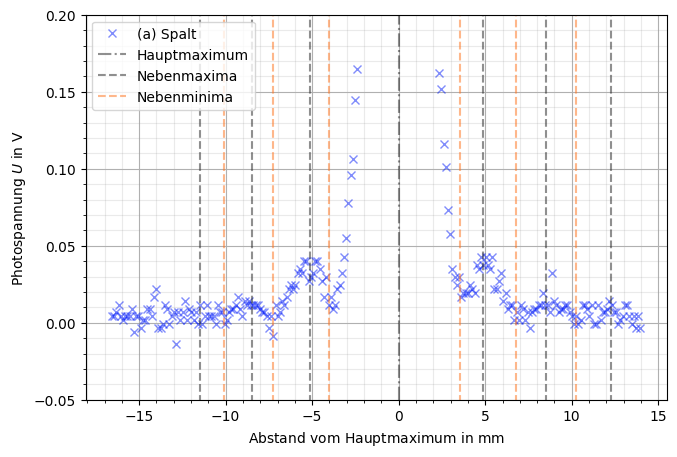

In [94]:
# (a) Spalt

# Hauptmaximum
max_spalt = 13050

# Nebenmaxima
smax_l3_spalt = -11.5
smax_l2_spalt = -8.5
smax_l1_spalt = -5.1

smax_r1_spalt = 4.9
smax_r2_spalt = 8.5
smax_r3_spalt = 12.25

# Nebenminima
smin_l3_spalt = -10.1
smin_l2_spalt = -7.25
smin_l1_spalt = -4#

smin_r1_spalt = 3.55
smin_r2_spalt = 6.75
smin_r3_spalt = 10.25


# Datenarrays
motorposition_spalt = (a_spalt_dataframe[:,0] - max_spalt) / 400
photospannung_spalt = a_spalt_dataframe[:,1]

fig, ax = plt.subplots(figsize=(7.5,5))
ax.set_xlabel(r'Abstand vom Hauptmaximum in $\mathrm{mm}$')
ax.set_ylabel(r'Photospannung $U$ in $\mathrm{V}$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()

ax.plot(motorposition_spalt, photospannung_spalt, color = 'xkcd:rich blue', marker = "x",  linestyle = "", alpha = 0.5, linewidth = 1, label = '(a) Spalt')

# Hauptmaximum
plt.axvline(x = 0, color = '#212121', linestyle = "-.", alpha = 0.5, linewidth = 1.5, label = 'Hauptmaximum')
plt.vlines(x = [smax_l3_spalt, smax_l2_spalt, smax_l1_spalt, smax_r1_spalt, smax_r2_spalt, smax_r3_spalt], ymin = -2, ymax = 10, colors = '#212121', ls = '--', alpha = 0.5, lw = 1.5, label = 'Nebenmaxima')     # Nebenmaxima
plt.vlines(x = [smin_l3_spalt, smin_l2_spalt, smin_l1_spalt, smin_r1_spalt, smin_r2_spalt, smin_r3_spalt], ymin = -2, ymax = 10, colors = '#FE7018', ls = '--', alpha = 0.5, lw = 1.5, label = 'Nebenminima')     # Nebenminima

ax.legend()
ax.legend(loc="upper left")

plt.ylim([-0.05, 0.2])

plt.savefig('./V24_BI_Spalt.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

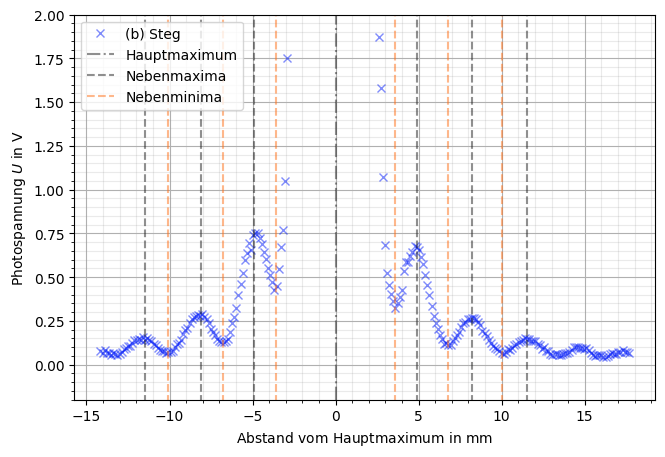

In [83]:
# (b) Steg

# Hauptmaximum
max_steg = 19900

# Nebenmaxima
smax_l3_steg = -11.5
smax_l2_steg = -8.1
smax_l1_steg = -4.9

smax_r1_steg = 4.9
smax_r2_steg = 8.2
smax_r3_steg = 11.5

# Nebenminima
smin_l3_steg = -10.1
smin_l2_steg = -6.8
smin_l1_steg = -3.6

smin_r1_steg = 3.55
smin_r2_steg = 6.75
smin_r3_steg = 10


# Datenarrays
motorposition_steg = (b_steg_dataframe[:,0] - max_steg) / 400
photospannung_steg = b_steg_dataframe[:,1]

fig, ax = plt.subplots(figsize=(7.5,5))
ax.set_xlabel(r'Abstand vom Hauptmaximum in $\mathrm{mm}$')
ax.set_ylabel(r'Photospannung $U$ in $\mathrm{V}$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()

ax.plot(motorposition_steg, photospannung_steg, color = 'xkcd:rich blue', marker = "x",  linestyle = "", alpha = 0.5, linewidth = 1, label = '(b) Steg')

plt.axvline(x = 0, color = '#212121', linestyle = "-.", alpha = 0.5, linewidth = 1.5, label = 'Hauptmaximum')   # Hauptmaximum
plt.vlines(x = [smax_l3_steg, smax_l2_steg, smax_l1_steg, smax_r1_steg, smax_r2_steg, smax_r3_steg], ymin = -2, ymax = 10, colors = '#212121', ls = '--', alpha = 0.5, lw = 1.5, label = 'Nebenmaxima')     # Nebenmaxima
plt.vlines(x = [smin_l3_steg, smin_l2_steg, smin_l1_steg, smin_r1_steg, smin_r2_steg, smin_r3_steg], ymin = -2, ymax = 10, colors = '#FE7018', ls = '--', alpha = 0.5, lw = 1.5, label = 'Nebenminima')     # Nebenminima

ax.legend()
ax.legend(loc="upper left")

plt.ylim([-0.2, 2])

plt.savefig('./V24_BI_Spalt.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

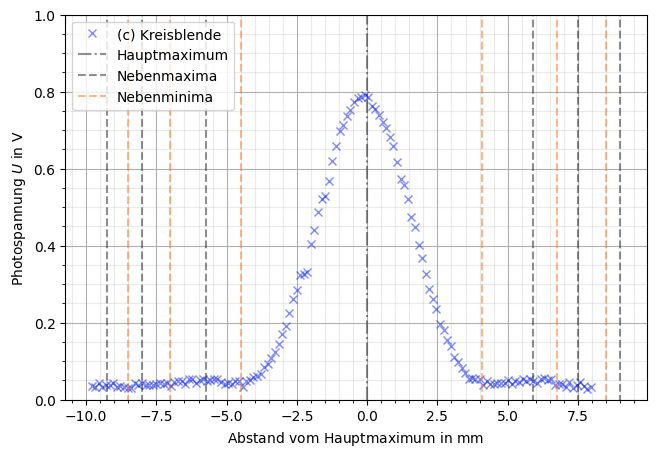

In [85]:
# (c) Kreisblende

# Hauptmaximum
max_kreisblende = 20000

# Nebenmaxima
smax_l3_kreisblende = -9.25
smax_l2_kreisblende = -8
smax_l1_kreisblende = -5.75

smax_r1_kreisblende = 5.9
smax_r2_kreisblende = 7.5
smax_r3_kreisblende = 9

# Nebenminima
smin_l3_kreisblende = -8.5
smin_l2_kreisblende = -7
smin_l1_kreisblende = -4.5

smin_r1_kreisblende = 4.1 #
smin_r2_kreisblende = 6.75
smin_r3_kreisblende = 8.5

# Datenarrays
motorposition_kreisblende = (c_kreisblende_dataframe[:,0] - max_kreisblende) / 400
photospannung_kreisblende = c_kreisblende_dataframe[:,1]


fig, ax = plt.subplots(figsize=(7.5,5))
ax.set_xlabel(r'Abstand vom Hauptmaximum in $\mathrm{mm}$')
ax.set_ylabel(r'Photospannung $U$ in $\mathrm{V}$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()
ax.plot(motorposition_kreisblende, photospannung_kreisblende, color = 'xkcd:rich blue', marker = "x",  linestyle = "", alpha = 0.5, linewidth = 1, label = '(c) Kreisblende')

plt.axvline(x = 0, color = '#212121', linestyle = "-.", alpha = 0.5, linewidth = 1.5, label = 'Hauptmaximum')
plt.vlines(x = [smax_l3_kreisblende, smax_l2_kreisblende, smax_l1_kreisblende, smax_r1_kreisblende, smax_r2_kreisblende, smax_r3_kreisblende], ymin = -2, ymax = 10, colors = '#212121', ls = '--', alpha = 0.5, lw = 1.5, label = 'Nebenmaxima')     # Nebenmaxima
plt.vlines(x = [smin_l3_kreisblende, smin_l2_kreisblende, smin_l1_kreisblende, smin_r1_kreisblende, smin_r2_kreisblende, smin_r3_kreisblende], ymin = -2, ymax = 10, colors = '#FE7018', ls = '--', alpha = 0.5, lw = 1.5, label = 'Nebenminima')     # Nebenminima

ax.legend()
ax.legend(loc="upper left")

plt.ylim([-0, 1])

plt.savefig('./V24_BI_Spalt.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

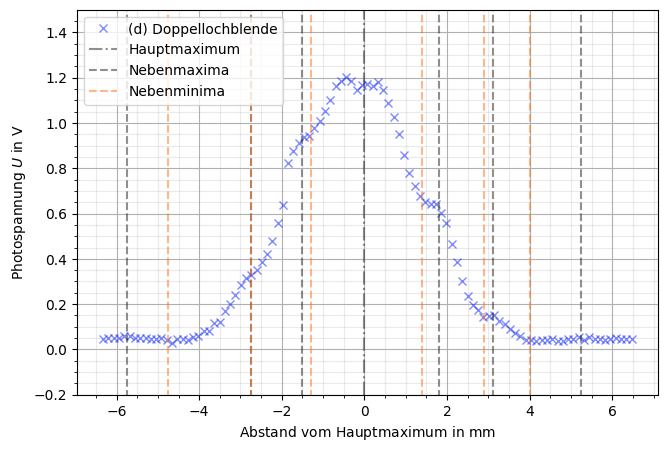

In [61]:
# (d) Doppellochblende

# Hauptmaximum
max_doppellochblende = 20000

# Nebenmaxima
smax_l3_doppellochblende = -5.75
smax_l2_doppellochblende = -2.75
smax_l1_doppellochblende = -1.5

smax_r1_doppellochblende = 1.8
smax_r2_doppellochblende = 3.1
smax_r3_doppellochblende = 5.25

# Nebenminima
smin_l3_doppellochblende = -4.75
smin_l2_doppellochblende = -2.75    # the truth hurts
smin_l1_doppellochblende = -1.3

smin_r1_doppellochblende = 1.4
smin_r2_doppellochblende = 2.9
smin_r3_doppellochblende = 4


# Datenarrays
motorposition_doppellochblende = (d_doppellochblende_dataframe[:,0] - max_doppellochblende) / 400
photospannung_doppellochblende = d_doppellochblende_dataframe[:,1]

# Plot
fig, ax = plt.subplots(figsize=(7.5,5))
ax.set_xlabel(r'Abstand vom Hauptmaximum in $\mathrm{mm}$')
ax.set_ylabel(r'Photospannung $U$ in $\mathrm{V}$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()
ax.plot(motorposition_doppellochblende, photospannung_doppellochblende, color = 'xkcd:rich blue', marker = "x",  linestyle = "", alpha = 0.5, linewidth = 1, label = '(d) Doppellochblende')

plt.axvline(x = 0, color = '#212121', linestyle = "-.", alpha = 0.5, linewidth = 1.5, label = 'Hauptmaximum') # Hauptmaximum
plt.vlines(x = [smax_l3_doppellochblende, smax_l2_doppellochblende, smax_l1_doppellochblende, smax_r1_doppellochblende, smax_r2_doppellochblende, smax_r3_doppellochblende], ymin = -2, ymax = 10, colors = '#212121', ls = '--', alpha = 0.5, lw = 1.5, label = 'Nebenmaxima')     # Nebenmaxima
plt.vlines(x = [smin_l3_doppellochblende, smin_l2_doppellochblende, smin_l1_doppellochblende, smin_r1_doppellochblende, smin_r2_doppellochblende, smin_r3_doppellochblende], ymin = -2, ymax = 10, colors = '#FE7018', ls = '--', alpha = 0.5, lw = 1.5, label = 'Nebenminima')     # Nebenminima

ax.legend()
ax.legend(loc="upper left")

plt.ylim([-0.2, 1.5])

plt.savefig('./V24_BI_Spalt.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

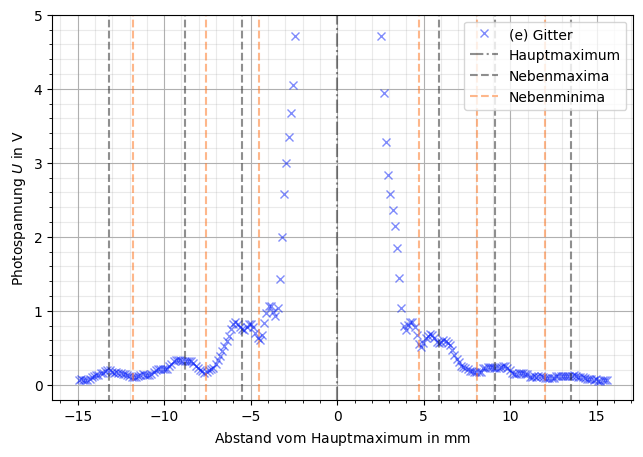

In [44]:
# (e) Gitter

# Hauptmaximum
max_gitter = 19350 

# Nebenmaxima
smax_l3_gitter = -13.2
smax_l2_gitter = -8.8
smax_l1_gitter = -5.5

smax_r1_gitter = 5.9
smax_r2_gitter = 9.1
smax_r3_gitter = 13.5

# Nebenminima
smin_l3_gitter = -11.8
smin_l2_gitter = -7.6
smin_l1_gitter = -4.5

smin_r1_gitter = 4.7
smin_r2_gitter = 8.1
smin_r3_gitter = 12


# Datenarrays
motorposition_gitter = (e_gitter_dataframe[:,0] - max_gitter) / 400
photospannung_gitter = e_gitter_dataframe[:,1]

# Plot
fig, ax = plt.subplots(figsize=(7.5,5))
ax.set_xlabel(r'Abstand vom Hauptmaximum in $\mathrm{mm}$')
ax.set_ylabel(r'Photospannung $U$ in $\mathrm{V}$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()
ax.plot(motorposition_gitter, photospannung_gitter, color = 'xkcd:rich blue', marker = "x",  linestyle = "", alpha = 0.5, linewidth = 1, label = '(e) Gitter')  

plt.axvline(x = 0, color = '#212121', linestyle = "-.", alpha = 0.5, linewidth = 1.5, label = 'Hauptmaximum')   # Hauptmaximum
plt.vlines(x = [smax_l3_gitter, smax_l2_gitter, smax_l1_gitter, smax_r1_gitter, smax_r2_gitter, smax_r3_gitter], ymin = -2, ymax = 10, colors = '#212121', ls = '--', alpha = 0.5, lw = 1.5, label = 'Nebenmaxima')     # Nebenmaxima
plt.vlines(x = [smin_l3_gitter, smin_l2_gitter, smin_l1_gitter, smin_r1_gitter, smin_r2_gitter, smin_r3_gitter], ymin = -2, ymax = 10, colors = '#FE7018', ls = '--', alpha = 0.5, lw = 1.5, label = 'Nebenminima')     # Nebenminima

ax.legend()
ax.legend(loc = "upper right")

plt.ylim([-0.2, 5])

plt.savefig('./V24_BI_Spalt.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

In [45]:
# Datenweiterverarbeitung whatever

# Abstand
distance = 1.1
distance_error = 0.1

# globale Ableseungenauigkeit
minmax_error = 0.5

x_xmax, l = sy.symbols('x_xmax, l')

# Returniert sin(alpha), Fehler für gegebene Abstände zum Hauptmaximum
def f_sin_alpha(x):
    sin_apha, sin_alpha_error = err_gauss(
        sy.sin(sy.arctan(x_xmax/l)),
        x_xmax, x, minmax_error,
        l, distance, distance_error,
    )
    return sin_apha, sin_alpha_error



